In [1]:
# https://arxiv.org/pdf/1409.1556
# https://deanhan.com/2018/07/26/vgg16/

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 若下載失敗，請先刪除 c:\<使用者>\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5
# command shift . to get .folders in finder
model = tf.keras.applications.ResNet101(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
model.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 44,707,176 (170.54 MB)

 Trainable params: 44,601,832 (170.14 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [6]:
# https://github.com/handsomeboy/vgg16 
# img_path = 'frog.jpg'
# img_path = 'tiger.jpg' # 并转化为224*224的标准尺寸
img_path = 'bagel.jpg'

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = tf.keras.preprocessing.image.img_to_array(img) #转化为浮点型
x = np.expand_dims(x, axis=0)#转化为张量size为(1, 224, 224, 3)
x = tf.keras.applications.vgg16.preprocess_input(x)

# 預測，取得features，維度為 (1,1000)
features = model.predict(x)

# 取得前五個最可能的類別及機率
pred = tf.keras.applications.vgg16.decode_predictions(features, top=5)[0]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


[('n07693725', 'bagel', 0.9990368),
 ('n07695742', 'pretzel', 0.0005769513),
 ('n02776631', 'bakery', 0.00030320388),
 ('n07697313', 'cheeseburger', 3.8937436e-05),
 ('n07860988', 'dough', 7.712948e-06)]

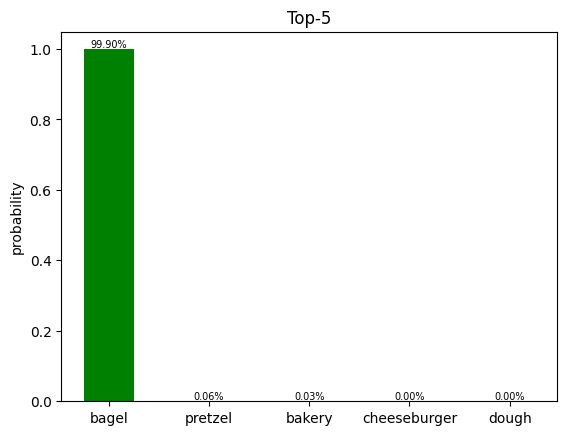

In [7]:
#整理预测结果,value
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

#绘图并保存
def percent(value):
    return '%.2f%%' % (value * 100)

fig=plt.figure(u"Top-5 预测结果")
ax = fig.add_subplot(111)
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability')
ax.set_title(u'Top-5')
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

name=img_path[0:-4]+'_pred'
fig.savefig(name, dpi=200)